In [3]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/16.2 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2 MB 10.5 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.2 MB 10.7 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/16.2 MB 10.4 MB/s eta 0:00:01
   -------------------------- ------------- 10.7/16.2 MB 10.2 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 10.0 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.2 MB 9.7 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.2 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 9.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.3 MB 10.7 MB/s eta 0:00:01
   ------------------------- -------------- 3.9/6.3 MB 9.8 MB/s eta 0:00:01
   -

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [7]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.012, -87.0214 36...."


In [9]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


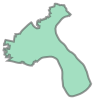

In [11]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [13]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.687146962761 36.318206917893, -86.687112187256 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.687034690751 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.686903827781 36.318191625285, -86.68686914958 36.318189102792, -86.686834437433 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.686557318725 36.318162634491, -86.686522735235 36.318159287854, -86.686488151499 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549015 36.318137389391, -86.6862

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


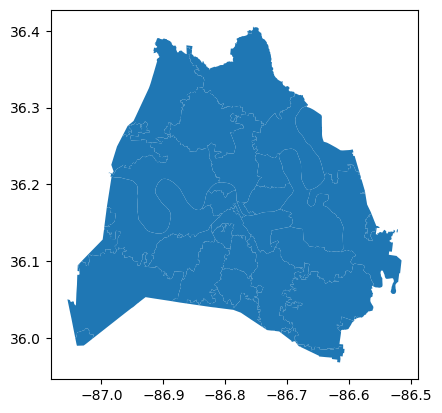

In [15]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


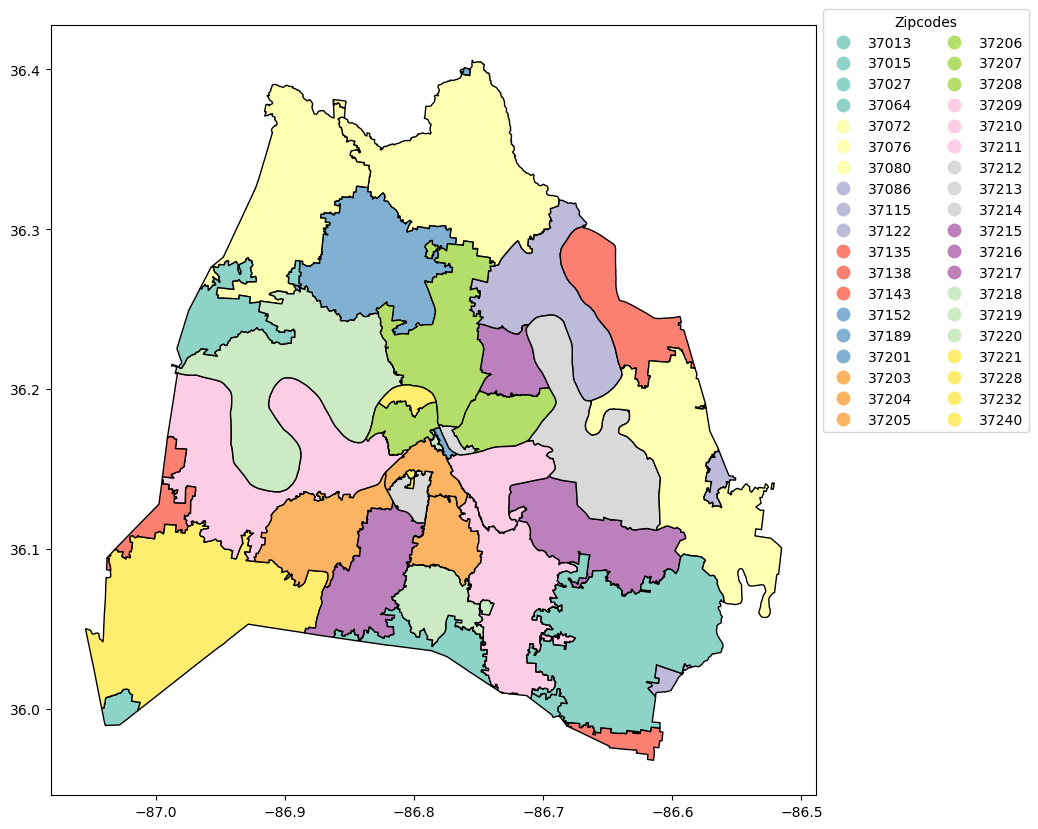

In [73]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [19]:
voting = pd.read_csv('../data/vote.csv')
print(voting.shape)
voting.head(3)

(178, 12)


,X,Y,FacilityName,Precinct,Address,Hours,NextElection,Email,City,ZipCode,GlobalID,OBJECTID
0,-86.747251,36.373445,Luton's United Methodist Church\r\n,10-1,8363 Old Springfield Pike,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,1c91a6ae-2049-4403-826f-22c7a54aebc0,1
1,-86.757595,36.342378,Walker's United Methodist Church,10-2,2947 Lower Walkers Creek Rd,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,3bd152c1-fd71-44f7-9ba0-2b8eefbdb5d3,2
2,-86.715809,36.321014,Goodlettsville Delmas Long Community Center,10-8,200 Memorial Dr,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,d01b1c48-d70a-41ce-ad4c-11c98322c27b,3


In [21]:
voting.columns = ['lng', 'lat', 'FacilityName', 'Precinct', 'Address', 'Hours', 'NextElection', 'Email', 'City', 'ZipCode', 'GlobalID', 'OBJECTID']

In [23]:
voting.head()

,lng,lat,FacilityName,Precinct,Address,Hours,NextElection,Email,City,ZipCode,GlobalID,OBJECTID
0,-86.747251,36.373445,Luton's United Methodist Church\r\n,10-1,8363 Old Springfield Pike,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,1c91a6ae-2049-4403-826f-22c7a54aebc0,1
1,-86.757595,36.342378,Walker's United Methodist Church,10-2,2947 Lower Walkers Creek Rd,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,3bd152c1-fd71-44f7-9ba0-2b8eefbdb5d3,2
2,-86.715809,36.321014,Goodlettsville Delmas Long Community Center,10-8,200 Memorial Dr,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,d01b1c48-d70a-41ce-ad4c-11c98322c27b,3
3,-86.715177,36.314004,First Baptist Church Goodlettsville,10-4,613 S Main St,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,fae409fd-0082-4d83-976c-a46740e5838a,4
4,-86.732550,36.283931,Parkway Baptist Church,10-5,505 Cunniff Parkway,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,01fdc2ff-eb09-4967-9d30-10030245d4a3,5


In [25]:
voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lng           178 non-null    float64
 1   lat           178 non-null    float64
 2   FacilityName  178 non-null    object 
 3   Precinct      178 non-null    object 
 4   Address       178 non-null    object 
 5   Hours         178 non-null    object 
 6   NextElection  178 non-null    object 
 7   Email         178 non-null    object 
 8   City          178 non-null    object 
 9   ZipCode       178 non-null    int64  
 10  GlobalID      178 non-null    object 
 11  OBJECTID      178 non-null    int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 16.8+ KB


- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [27]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [29]:
vote_geo = gpd.GeoDataFrame(voting, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(voting.lng, voting.lat))

In [31]:
type(vote_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [33]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [35]:
stops_by_zip = gpd.sjoin(vote_geo, zipcodes, predicate = 'within')

In [37]:
stops_by_zip.head()

,lng,lat,FacilityName,Precinct,Address,Hours,NextElection,Email,City,ZipCode,GlobalID,OBJECTID,geometry,index_right,zip,po_name
0,-86.747251,36.373445,Luton's United Methodist Church\r\n,10-1,8363 Old Springfield Pike,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,1c91a6ae-2049-4403-826f-22c7a54aebc0,1,POINT (-86.74725 36.37345),8,37072,GOODLETTSVILLE
1,-86.757595,36.342378,Walker's United Methodist Church,10-2,2947 Lower Walkers Creek Rd,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,3bd152c1-fd71-44f7-9ba0-2b8eefbdb5d3,2,POINT (-86.7576 36.34238),8,37072,GOODLETTSVILLE
2,-86.715809,36.321014,Goodlettsville Delmas Long Community Center,10-8,200 Memorial Dr,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,d01b1c48-d70a-41ce-ad4c-11c98322c27b,3,POINT (-86.71581 36.32101),8,37072,GOODLETTSVILLE
3,-86.715177,36.314004,First Baptist Church Goodlettsville,10-4,613 S Main St,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,fae409fd-0082-4d83-976c-a46740e5838a,4,POINT (-86.71518 36.314),8,37072,GOODLETTSVILLE
4,-86.732550,36.283931,Parkway Baptist Church,10-5,505 Cunniff Parkway,7am - 7pm,2024/11/05 00:00:00+00,vote.questions@nashville.gov,Goodlettsville,37072,01fdc2ff-eb09-4967-9d30-10030245d4a3,5,POINT (-86.73255 36.28393),8,37072,GOODLETTSVILLE


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [39]:
stops_by_zip['zip'].value_counts()

zip
37013    18
37211    15
37207    12
37209    12
37217    10
37206     9
37076     9
37216     8
37115     8
37221     8
37214     8
37205     7
37072     7
37203     5
37210     5
37218     5
37215     5
37204     5
37212     4
37208     4
37189     3
37138     3
37220     2
37027     2
37080     2
37219     1
37228     1
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [41]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape

(12, 16)

In [43]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

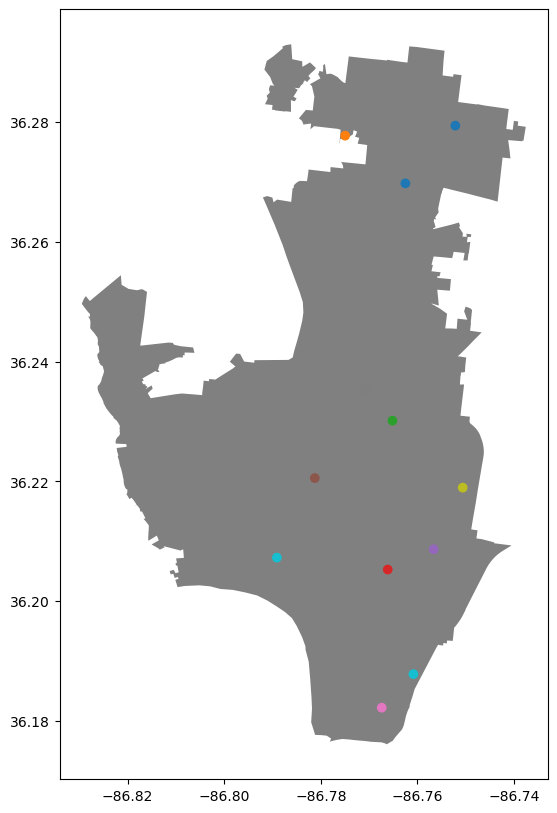

In [45]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'grey')
stops_in_37207.plot( ax = ax, column = 'Address');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [47]:
polygon37207.geometry.centroid

C:\Users\KLSHA\AppData\Local\Temp\ipykernel_2412\3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


19    POINT (-86.78726 36.28724)
42    POINT (-86.77677 36.23245)
dtype: geometry

In [49]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


C:\Users\KLSHA\AppData\Local\Temp\ipykernel_2412\3995710814.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[42]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [51]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [53]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [55]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 53
values are:
 
lng                                            -86.765158
lat                                             36.230125
FacilityName             Olivet Missionary Baptist Church
Precinct                                              2-1
Address                                      144 Ewing Dr
Hours                                           7am - 7pm
NextElection                       2024/11/05 00:00:00+00
Email                        vote.questions@nashville.gov
City                                            Nashville
ZipCode                                             37207
GlobalID             43a1a2ad-cb4a-4cd7-a2d7-271226d6c297
OBJECTID                                               55
geometry        POINT (-86.7651578011887 36.230125234103)
index_right                                            42
zip                                                 37207
po_name                                         NASHVILLE
Name: 53, dtype: object
----------------------

#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [61]:
#draw our zip code area: 37207
map_37207 = folium.Map(tiles = "Cartodb dark_matter", location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="darkblue",icon="check", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [63]:
folium.Map?

Init signature:
folium.Map(
    location: Optional[Sequence[float]] = None,
    width: Union[str, float] = '100%',
    height: Union[str, float] = '100%',
    left: Union[str, float] = '0%',
    top: Union[str, float] = '0%',
    position: str = 'relative',
    tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap',
    attr: Optional[str] = None,
    min_zoom: Optional[int] = None,
    max_zoom: Optional[int] = None,
    zoom_start: int = 10,
    min_lat: float = -90,
    max_lat: float = 90,
    min_lon: float = -180,
    max_lon: float = 180,
    max_bounds: bool = False,
    crs: str = 'EPSG3857',
    control_scale: bool = False,
    prefer_canvas: bool = False,
    no_touch: bool = False,
    disable_3d: bool = False,
    png_enabled: bool = False,
    zoom_control: Union[bool, str] = True,
    font_size: str = '1rem',
    **kwargs: Union[str, float, bool, Sequence, dict, NoneType],
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base m

In [67]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="blue",icon="check", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [69]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207